<p><img alt="UdeA logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>
<div align="center">
  
<h1> <b> Tarea 1 Aprendizaje estadistico, Trabajo de Dataframes</b> </h1>

</div>

<!-- <br> le permite hacer espacios -->
<br>

<hr size=10 noshade color="green">
<p>


<div align="right">       

<h3><i> <b> Ortíz Campo Jose David</b> <br>  
Universidad de Antioquia <br>
Instituto de Física  <br>
jose.ortizc@udea.edu.co

</i></h3>
</div>


---

In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from scipy.stats import linregress

df=sns.load_dataset("penguins")

In [291]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### 1.¿Cuántas especies diferentes de pingüinos hay en el dataset? ¿Que caracteristicas de los pinguinos se dan para cada especie?

In [292]:
df.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

Según eso hay 3 especies, de pinguinos, sin embargo de forma general(en el caso de que tuviese un numero muy grande de contar a ojo usaria len ) y pues las caracteristicas las darian el dataframe

In [293]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

Según eso está la isla en la cual se encuentran, la longitud del pico, la profundida del pico en mm, la longitud de las aletas, la masa de los pinguinos y el sexo.

### 2¿Hay valores faltantes en las variables? Determine una estrategie de limpieza y apliquela.


Para resolver esto se me ocurre verificar para cada columna hay algun valor None, si es cierto simplemente elimino toda la fila asociada a dicho valor. Para esto se me ocurre usar aplicar mascaras

In [294]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [295]:
df[df["sex"].notna()] # el notna regersa un valor de verdad para aquellos que no son nulos ayudando a realizar una mascara

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [296]:
for i in df.columns:
    df=df[df[i].notna()]

In [297]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


Al comparar con el usual dropna me doy cuenta que efectivamente si elimina todas las entradas no nulas

### 3¿Cuál es la isla con mayor número de pingüinos en el dataset? ¿Hay un desbalance en número en el número de pinguinos por isla?



Para esto se me ocurre primero  todas las islas para luego sacar el numero de pinguinos por isla y luego comparar. 

In [298]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [299]:
df[df['island'] == 'Torgersen'] # Ejemplo de salida de datos al segregar por una isla

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,Female
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,Male
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male


In [300]:
print(len(df[df['island'] == 'Torgersen']))
print(len(df[df['island'] == 'Dream']))
print(len(df[df['island'] == 'Biscoe']))


47
123
163


Por tanto si la isla con mayor numero de pinguinos es la de Biscoe. y si, hay un desbalance en el numero de pinguinos por isla precisamente por que hay cantidades diferentes.

### 4.Repita la pregunta anterior observando las especies.

De la pregunta 1 se que hay 3 especies, así que solo debo aplicar lo mismo solo que en vez de island es la caracteriscia specie y las especies correspondientes

In [301]:
df.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [302]:
print(len(df[df['species'] == 'Adelie']))
print(len(df[df['species'] == 'Chinstrap']))
print(len(df[df['species'] == 'Gentoo']))


146
68
119


Se puede observar que hay un desvalance en la cantidad de pinguinos por especie. Mas aún los pinguinos que predominan son los de la especie Adelie

### 5.¿Cuál es la longitud media y la desviacion estandard del tamaño del pico de los pingüinos por especie?



Pues como ya sé dividir por especie aplicando mascara solo es sacar la longitud media y desviacion estandar luego de haber aplicado la mascara

In [303]:
df[df['species'] == 'Adelie']['bill_length_mm'] # Ejemplo de salida de datos segregando por una especie especifica y luego sacando la columna del largor del pico de los pinguinos

0      39.1
1      39.5
2      40.3
4      36.7
5      39.3
       ... 
147    36.6
148    36.0
149    37.8
150    36.0
151    41.5
Name: bill_length_mm, Length: 146, dtype: float64

In [304]:
print('la media para Gentoo sería', round(np.mean(df[df['species'] == 'Gentoo']['bill_length_mm']), 2))
print('la media para Chinstrap sería', round(np.mean(df[df['species'] == 'Chinstrap']['bill_length_mm']), 2))
print('la media para Adelie sería', round(np.mean(df[df['species'] == 'Adelie']['bill_length_mm']), 2))


la media para Gentoo sería 47.57
la media para Chinstrap sería 48.83
la media para Adelie sería 38.82


In [305]:
print('la desviacion estandar para Gentoo sería', round(np.std(df[df['species'] == 'Gentoo']['bill_length_mm']), 2))
print('la desviacion estandar para Chinstrap sería', round(np.std(df[df['species'] == 'Chinstrap']['bill_length_mm']), 2))
print('la desviacion estandar para Adelie sería', round(np.std(df[df['species'] == 'Adelie']['bill_length_mm']), 2))


la desviacion estandar para Gentoo sería 3.09
la desviacion estandar para Chinstrap sería 3.31
la desviacion estandar para Adelie sería 2.65


### 6.¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?

In [306]:
max(df['bill_length_mm']) # pero claro, este solo muestra el maximo de la columna bill_length_mm, no su posición


59.6

In [307]:
df[df['bill_length_mm'] == max(df['bill_length_mm'])] # para ver el valor máximo y su posición

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,Male


Ahí claramente se ve que su especie es Gentoo

### 7.¿Como es la distribución de la masa corporal entre las especies de pingüinos?



Se puede segregar realizando mascaras como se realizó en el punto 4 y luego sacar su parte de la masa y sacar un histograma de cada una de las especies, primero sacaré la total

In [308]:
df['body_mass_g']

0      3750.0
1      3800.0
2      3250.0
4      3450.0
5      3650.0
        ...  
338    4925.0
340    4850.0
341    5750.0
342    5200.0
343    5400.0
Name: body_mass_g, Length: 333, dtype: float64

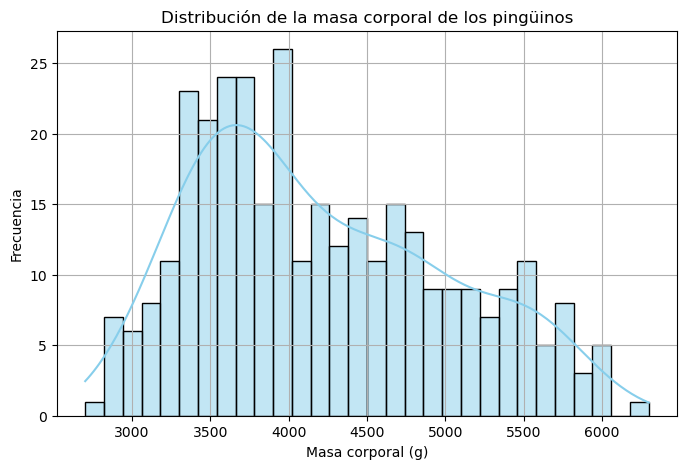

In [309]:
plt.figure(figsize=(8, 5))
sns.histplot(df['body_mass_g'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribución de la masa corporal de los pingüinos')
plt.xlabel('Masa corporal (g)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

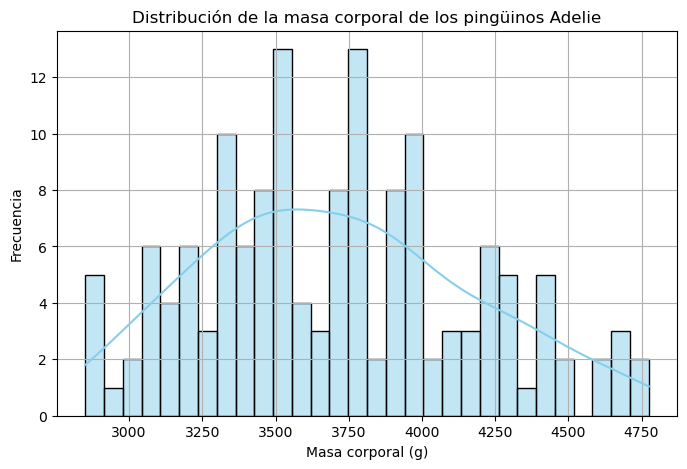

In [310]:
# Distribución de la masa corporal de los pingüinos por especie

df[df['species'] == 'Adelie']['body_mass_g']
plt.figure(figsize=(8, 5))
sns.histplot(df[df['species'] == 'Adelie']['body_mass_g'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribución de la masa corporal de los pingüinos Adelie')
plt.xlabel('Masa corporal (g)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

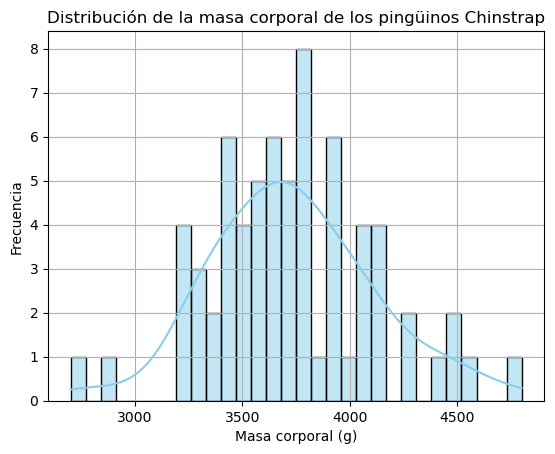

In [311]:
sns.histplot(df[df['species'] == 'Chinstrap']['body_mass_g'], bins=30, kde=True, color='skyblue', edgecolor='black')    
plt.title('Distribución de la masa corporal de los pingüinos Chinstrap')
plt.xlabel('Masa corporal (g)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


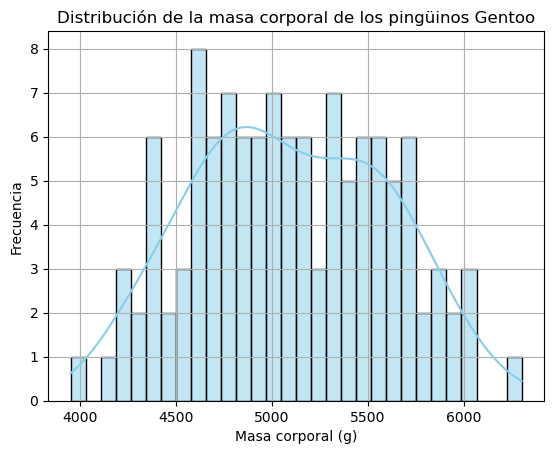

In [312]:
sns.histplot(df[df['species'] == 'Gentoo']['body_mass_g'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribución de la masa corporal de los pingüinos Gentoo')
plt.xlabel('Masa corporal (g)')
plt.ylabel('Frecuencia')
plt.grid(True)

Pues observo que cada una de las 3 son como unas gaussianas que dependiendo le numero de bins se parecen un poquito  o menos. Lo cual deberia de tener sentido, pues es como una medida aleatoria(la naturaleza deberia ser así).

### 8.Describa la distribucion con ayuda de la media, desviacion estandard


Como el problema no especifica sobre que distribución(es decir la total o segregada por especies) debe realizarse la descripción, entonces la realizaré sobre la masa corporal los pinguinos de especie Chinstrapp

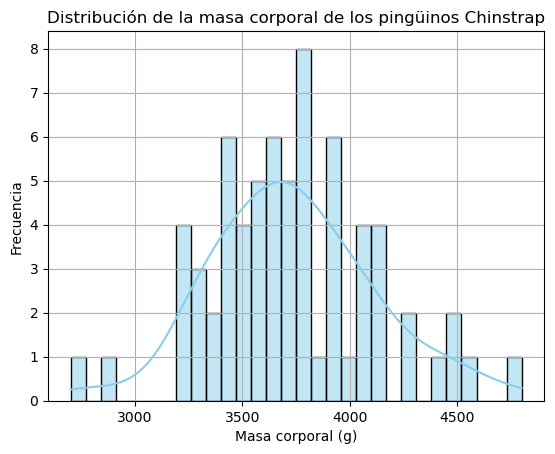

In [313]:
sns.histplot(df[df['species'] == 'Chinstrap']['body_mass_g'], bins=30, kde=True, color='skyblue', edgecolor='black')    
plt.title('Distribución de la masa corporal de los pingüinos Chinstrap')
plt.xlabel('Masa corporal (g)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [314]:
print(np.mean(df[df['species'] == 'Chinstrap']['body_mass_g'])) # media de la masa corporal de los pingüinos
print(np.std(df[df['species'] == 'Chinstrap']['body_mass_g'])) # desviación estándar de la masa corporal de los pingüinos

3733.0882352941176
381.4986213564681


Según observo, la distribución es como si fuera una Gaussian, cuya media es de 3733.1 g, es decir lo que pesan en promedio los pinguinos de dicha especie. Por otro lado noto que la desviación es de 381.5 g haciendo que la gaussiana no sea ni achatada ni estirada.

### 9.¿Cuál es la diferencia en masa corporal promedio y desviacion estandard entre machos y hembras?


Basicamente es solo aplicar una mascara y sacar las diferencias, la mascara contendrá el sexo, y luego sacaré el peso de tanto machos como hembras maximo para sacar su diferencia.

In [315]:
abs(np.mean(df[df['sex']== 'Male']['body_mass_g'])-np.mean(df[df['sex']== 'Female']['body_mass_g']))

683.4117965367964

In [316]:
abs(np.std(df[df['sex']== 'Male']['body_mass_g'])-np.std(df[df['sex']== 'Female']['body_mass_g']))

121.13097346899201

Pues según eso la variacion entre la masa corporal promerio entre machos y hembras es de 683.41 gramos aproximadamente y respecto a la desviacion estandar es de 121.13

### 10.¿Cuál es la media y la desviación estándar de la longitud de la aleta de los pingüinos por especie?



Para resolverlo basicamente hay que realiar lo mismo que antes soloq ue luego de segregado por especie simplemenete saco la columna de la longitud de aleta, y luego le saco la media y desviacion correspondiente.

In [317]:
print(np.mean(df[df['species'] == 'Gentoo']['flipper_length_mm']))
print(np.mean(df[df['species'] == 'Chinstrap']['flipper_length_mm']))
print(np.mean(df[df['species'] == 'Adelie']['flipper_length_mm']))
print(np.std(df[df['species'] == 'Gentoo']['flipper_length_mm']))
print(np.std(df[df['species'] == 'Chinstrap']['flipper_length_mm']))
print(np.std(df[df['species'] == 'Adelie']['flipper_length_mm']))


217.23529411764707
195.8235294117647
190.1027397260274
6.557702357351426
7.079259633253839
6.499451454255971


Así los valores para la especie Gentoo de la media es de 217.23 y su desviacion es 6.58
Así los valores para la especie Chinstrap de la media es de 195.82 y su desviacion es 7.08
Así los valores para la especie Gentoo de la media es de 190.1 y su desviacion es 6.5

### 11.¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?



Analogó solo hay que aplicar mascaras para esto

In [318]:
print(max(df[df['species'] == 'Gentoo']['flipper_length_mm']))
print(max(df[df['species'] == 'Chinstrap']['flipper_length_mm']))
print(max(df[df['species'] == 'Adelie']['flipper_length_mm']))

231.0
212.0
210.0


In [319]:
print(min(df[df['species'] == 'Gentoo']['flipper_length_mm']))
print(min(df[df['species'] == 'Chinstrap']['flipper_length_mm']))
print(min(df[df['species'] == 'Adelie']['flipper_length_mm']))

203.0
178.0
172.0


Así la aleta maxima y minima para Gentoo son 231 y 203 respectivamente
Así la aleta maxima y minima para Chinstrap son 212 y 178 respectivamente
Así la aleta maxima y minima para Adelie son 210 y 172 respectivamente

### 12¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?



Sobre esta pregunta puedo realizar diferentes interpretaciones sin embargo supongo será el rango en el cual varia por especie e isla. Para esto aplicaré una mascará isla y por cada una de estas segregaré por especie y luego miraré su rango

In [320]:
df1=df[df['island'] == 'Torgersen']
df1['species'].unique()


#Por tanto la especie de pingüino que vive en la isla Torgersen es el Adelie

array(['Adelie'], dtype=object)

In [321]:
max(df1['bill_length_mm']),min(df1['bill_length_mm'])

(46.0, 33.5)

Por tanto la longitud de los picos de dichos pinguiones varia desde 33.5 hasta 46

In [322]:
df1=df[df['island'] == 'Dream']
df1['species'].unique()



array(['Adelie', 'Chinstrap'], dtype=object)

Noto que las especies de pingüinos que viven en la isla Dream son Adeline y Chinstrap, ahciendo mas dificil la segregación sin embargo esto se soluciona realizando una mascara.

In [323]:
min(df1[df1['species'] == 'Chinstrap']['bill_length_mm']),max(df1[df1['species'] == 'Chinstrap']['bill_length_mm'])

(40.9, 58.0)

In [324]:
min(df1[df1['species'] == 'Adelie']['bill_length_mm']),max(df1[df1['species'] == 'Adelie']['bill_length_mm'])

(32.1, 44.1)

Así la longitu de los de la isla Dream pero de especie Chinstrap varia desde 40.9 hasta 58
Así la longitu de los de la isla Dream pero de especie Adelie varia desde 32.1 hasta 44.1

In [325]:
df1=df[df['island'] == 'Biscoe']
df1['species'].unique()

array(['Adelie', 'Gentoo'], dtype=object)

Pasa lo mismo que para la isla anterior hay de 2 especies distintas en dicha isla Biscoe

In [326]:
min(df1[df1['species'] == 'Adelie']['bill_length_mm']),max(df1[df1['species'] == 'Adelie']['bill_length_mm'])

(34.5, 45.6)

Para la isla de Biscoe los pinguiones de especie Adelie tienen picos uqe varian desde 34.5 hasta 45.6

In [327]:
min(df1[df1['species'] == 'Gentoo']['bill_length_mm']),max(df1[df1['species'] == 'Gentoo']['bill_length_mm'])

(40.9, 59.6)

Ahora los pinguinos de especie Gentoo tienenn picos que varian desde los 40.9 hasta los 59.6.

### 13¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?


Para responder esta pregunta basicamente debo aplicar una mascara de pinguino que segregue el dataset por isla y ver la diferencia entre los picos maximos y minimos.


In [328]:
print(max(df[df['island'] == 'Biscoe']['bill_length_mm'])-min(df[df['island'] == 'Biscoe']['bill_length_mm']))
print(max(df[df['island'] == 'Torgersen']['bill_length_mm'])-min(df[df['island'] == 'Torgersen']['bill_length_mm']))
print(max(df[df['island'] == 'Dream']['bill_length_mm'])-min(df[df['island'] == 'Dream']['bill_length_mm']))


25.1
12.5
25.9


Por tanto la isla con mayor variacion en el pico es la isla de Dream entre las 3 especies

### 14.¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos? ¿Cambia esa relación si se mira por especie? Utilice diagramas de dispersión para visualizarlos.

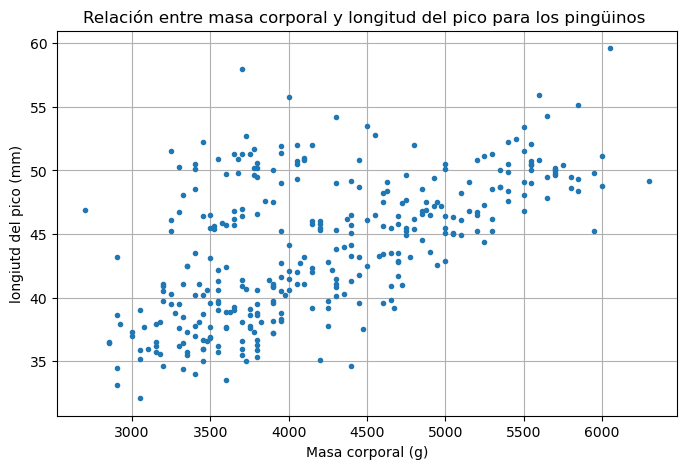

In [329]:


plt.figure(figsize=(8, 5))
plt.plot(df['body_mass_g'], df['bill_length_mm'], '.')
plt.title('Relación entre masa corporal y longitud del pico para los pingüinos ')
plt.xlabel('Masa corporal (g)')
plt.ylabel('longiutd del pico (mm)')
plt.grid(True)
plt.show()


A simple vista se observa que hay una especie de relación lineal entre la longitud del pico y su masa corporal, sin embargo quizas sea mas visible al segregarlo por especie o por isla.

In [330]:
df.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

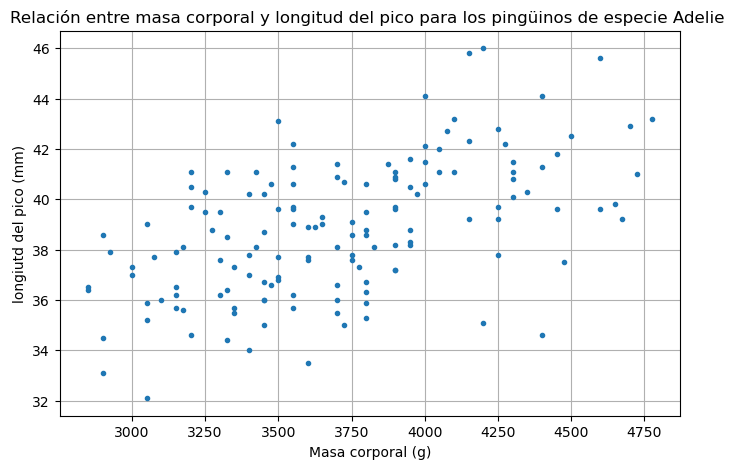

In [331]:


plt.figure(figsize=(8, 5))
plt.plot(df[df['species']== 'Adelie']['body_mass_g'], df[df['species']== 'Adelie']['bill_length_mm'], '.')
plt.title('Relación entre masa corporal y longitud del pico para los pingüinos de especie Adelie ')
plt.xlabel('Masa corporal (g)')
plt.ylabel('longiutd del pico (mm)')
plt.grid(True)
plt.show()

Aquí se nota una relación mucho mas lineal y es que entre mas masa tenga mas largor tendrá

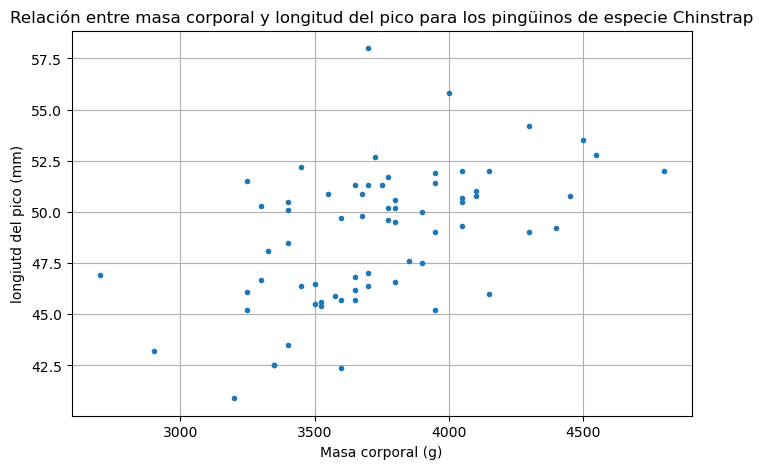

In [332]:

plt.figure(figsize=(8, 5))
plt.plot(df[df['species']== 'Chinstrap']['body_mass_g'], df[df['species']== 'Chinstrap']['bill_length_mm'], '.')
plt.title('Relación entre masa corporal y longitud del pico para los pingüinos de especie Chinstrap')
plt.xlabel('Masa corporal (g)')
plt.ylabel('longiutd del pico (mm)')
plt.grid(True)
plt.show()

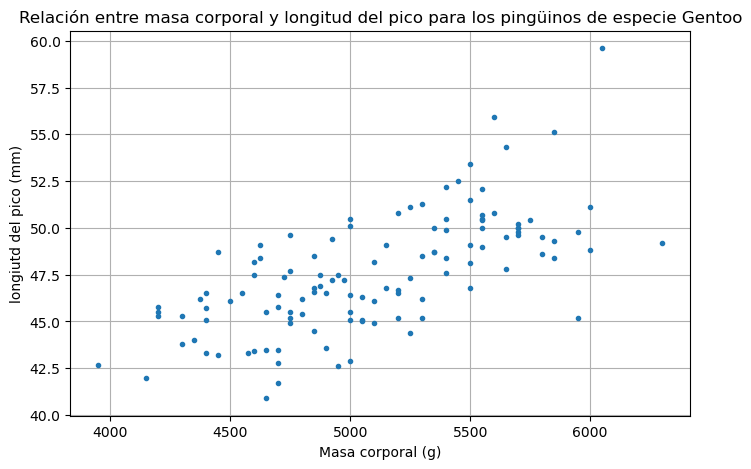

In [333]:

plt.figure(figsize=(8, 5))
plt.plot(df[df['species']== 'Gentoo']['body_mass_g'], df[df['species']== 'Gentoo']['bill_length_mm'], '.')
plt.title('Relación entre masa corporal y longitud del pico para los pingüinos de especie Gentoo')
plt.xlabel('Masa corporal (g)')
plt.ylabel('longiutd del pico (mm)')
plt.grid(True)
plt.show()

Para las especies Chinstrap y Gentoo se observa que tienen una relación lineal como para los casos anteriores entre la masa del pinguino y la longitud de su pico

Realizaré un ajuste lineal para ver la recta que mejor se ajusta para cada una de forma visible

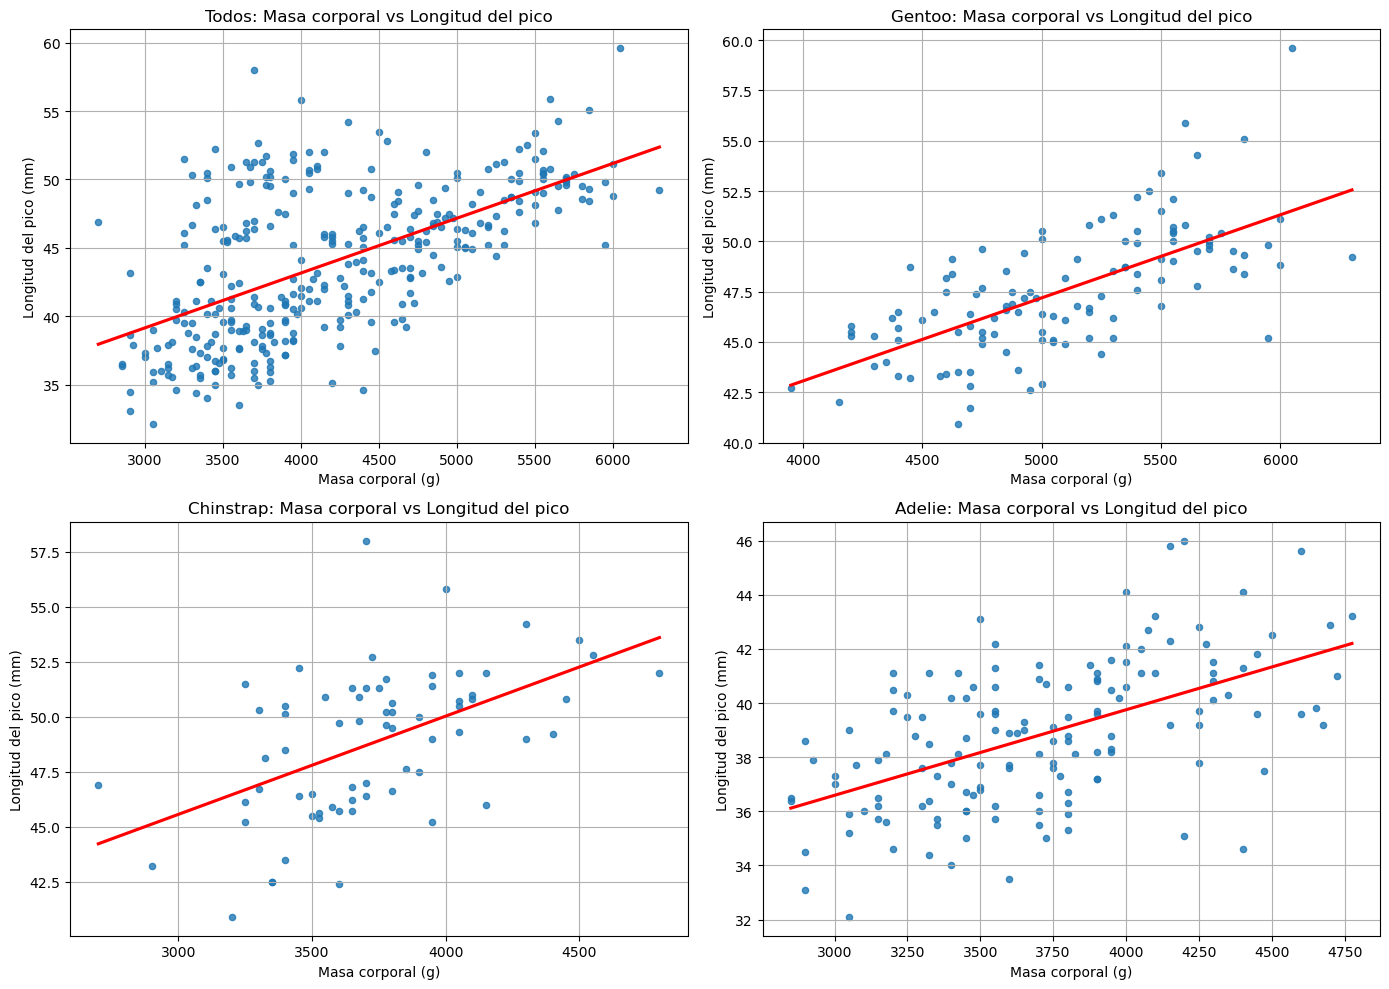

In [334]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.regplot(ax=axes[0, 0],
            x='body_mass_g', y='bill_length_mm',
            data=df,
            scatter_kws={'s': 20},
            line_kws={'color': 'red'},
            ci=None)
axes[0, 0].set_title('Todos: Masa corporal vs Longitud del pico')
axes[0, 0].set_xlabel('Masa corporal (g)')
axes[0, 0].set_ylabel('Longitud del pico (mm)')
axes[0, 0].grid(True)


sns.regplot(ax=axes[0, 1],
            x='body_mass_g', y='bill_length_mm',
            data=df[df['species'] == 'Gentoo'],
            scatter_kws={'s': 20},
            line_kws={'color': 'red'},
            ci=None)
axes[0, 1].set_title('Gentoo: Masa corporal vs Longitud del pico')
axes[0, 1].set_xlabel('Masa corporal (g)')
axes[0, 1].set_ylabel('Longitud del pico (mm)')
axes[0, 1].grid(True)


sns.regplot(ax=axes[1, 0],
            x='body_mass_g', y='bill_length_mm',
            data=df[df['species'] == 'Chinstrap'],
            scatter_kws={'s': 20},
            line_kws={'color': 'red'},
            ci=None)
axes[1, 0].set_title('Chinstrap: Masa corporal vs Longitud del pico')
axes[1, 0].set_xlabel('Masa corporal (g)')
axes[1, 0].set_ylabel('Longitud del pico (mm)')
axes[1, 0].grid(True)


sns.regplot(ax=axes[1, 1],
            x='body_mass_g', y='bill_length_mm',
            data=df[df['species'] == 'Adelie'],
            scatter_kws={'s': 20},
            line_kws={'color': 'red'},
            ci=None)
axes[1, 1].set_title('Adelie: Masa corporal vs Longitud del pico')
axes[1, 1].set_xlabel('Masa corporal (g)')
axes[1, 1].set_ylabel('Longitud del pico (mm)')
axes[1, 1].grid(True)


plt.tight_layout()
plt.show()


### 15¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?

In [335]:
df[['body_mass_g', 'bill_length_mm']].corr()


,body_mass_g,bill_length_mm
body_mass_g,1.000000,0.589451
bill_length_mm,0.589451,1.000000


In [336]:
df[df['species'] == 'Chinstrap'][['body_mass_g', 'bill_length_mm']].corr()

,body_mass_g,bill_length_mm
body_mass_g,1.000000,0.513638
bill_length_mm,0.513638,1.000000


In [337]:
df[df['species'] == 'Gentoo'][['body_mass_g', 'bill_length_mm']].corr()

,body_mass_g,bill_length_mm
body_mass_g,1.00000,0.66673
bill_length_mm,0.66673,1.00000


In [338]:
df[df['species'] == 'Adelie'][['body_mass_g', 'bill_length_mm']].corr()

,body_mass_g,bill_length_mm
body_mass_g,1.000000,0.544276
bill_length_mm,0.544276,1.000000


Según eso la correlación es de 0.51 , 0.67 y 0,54 sobre los pinguinos de Chinstrap, Gentoo y Adelie. Aunque no son muy grandes(cercanas a 1) existen.

### 16.¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos por especie?


Como el sexo no es una variable que solo toma 2 valores me parece apropiado hacer un diagrama de cajas, y ver como se comportan la longitud según el sexo

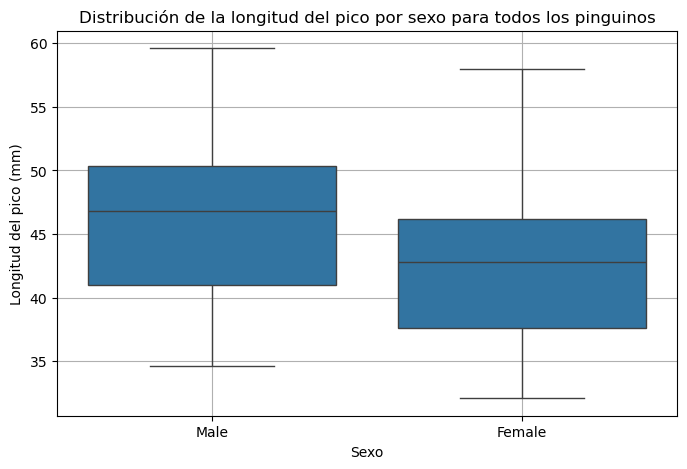

In [339]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='sex', y='bill_length_mm', data=df)
plt.title('Distribución de la longitud del pico por sexo para todos los pinguinos')
plt.xlabel('Sexo')
plt.ylabel('Longitud del pico (mm)')
plt.grid(True)
plt.show()

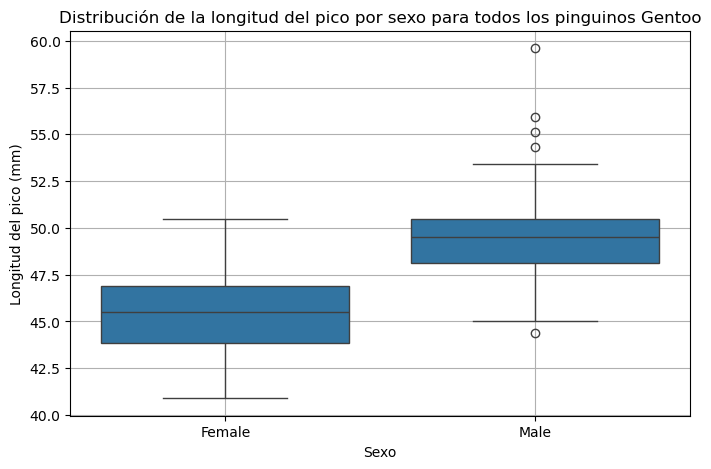

In [340]:
df1=df[df['species'] == 'Gentoo']

plt.figure(figsize=(8, 5))
sns.boxplot(x='sex', y='bill_length_mm', data=df1)
plt.title('Distribución de la longitud del pico por sexo para todos los pinguinos Gentoo')
plt.xlabel('Sexo')
plt.ylabel('Longitud del pico (mm)')
plt.grid(True)
plt.show()

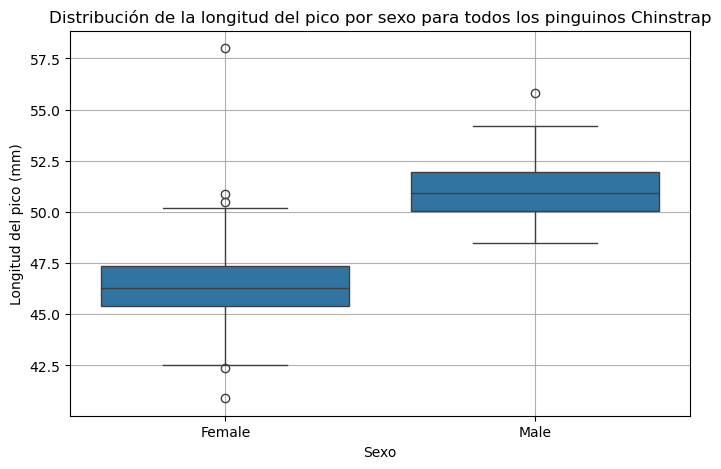

In [341]:
df1=df[df['species'] == 'Chinstrap']

plt.figure(figsize=(8, 5))
sns.boxplot(x='sex', y='bill_length_mm', data=df1)
plt.title('Distribución de la longitud del pico por sexo para todos los pinguinos Chinstrap')
plt.xlabel('Sexo')
plt.ylabel('Longitud del pico (mm)')
plt.grid(True)
plt.show()

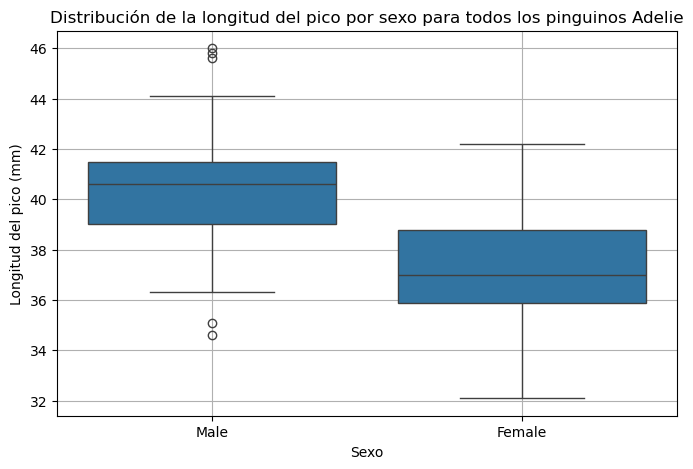

In [342]:
df1=df[df['species'] == 'Adelie']

plt.figure(figsize=(8, 5))
sns.boxplot(x='sex', y='bill_length_mm', data=df1)
plt.title('Distribución de la longitud del pico por sexo para todos los pinguinos Adelie')
plt.xlabel('Sexo')
plt.ylabel('Longitud del pico (mm)')
plt.grid(True)
plt.show()

De todas las graficas se observa claramente que los machos predominan la longitud de su pico(no se me ocurre otra).

### 17.Escoja una de las tendencias que haya observado en la cual haya una correlación entre las variables y ahora con un test de hipótesis determine si esta correlación puede ser explicada por aleatoriedad. Para esta pregunta puede usar las relaciones del libro "Probabilidad y Estadistica" de Marques de Cantu sección 12.6 donde hay un ejemplo 12.8 que les guia como usar las expresiones y hacer las conclusiones.

Escogeré la relación entre la masa de todos los pinguinos y la longitud de su pico.

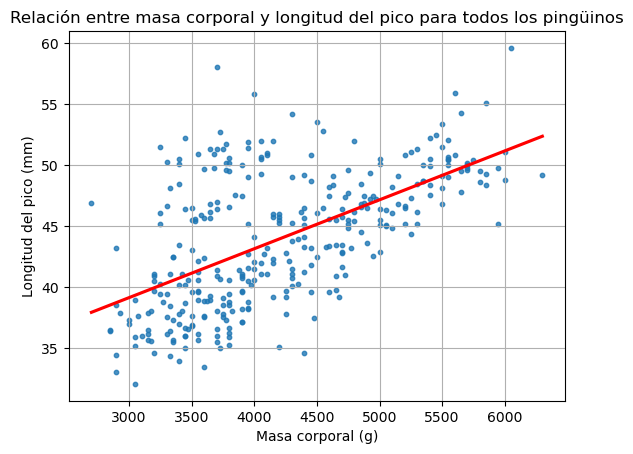

In [343]:
sns.regplot(
            x='body_mass_g', y='bill_length_mm',
            data=df,
            scatter_kws={'s': 10},
            line_kws={'color': 'red'},
            ci=None)
plt.title('Relación entre masa corporal y longitud del pico para todos los pingüinos')
plt.xlabel('Masa corporal (g)')
plt.ylabel('Longitud del pico (mm)')
plt.grid(True)

Según lo observado en clase lo que se puede realizar es suponer que los datos de longitud de pico seguirán una forma aleatoria respecto a los datos de masa corporal y esto se guarda en una serie de datos a los cuales se les sacará las pendientes y luego todas ellas formaran una distribución normal. Y luego observar si la pendiente que se obtiene de los datos está muy lejos o cerca de la distribución normal. 



Entonces 


Hipotesis nula. No hay relación entre los datos de la masa corporal y la longitud del pico




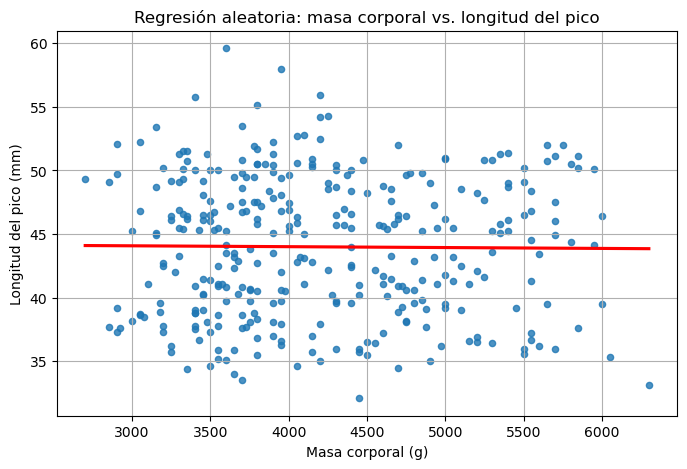

In [344]:
# Ejemplo de datos aleatorios


df_random = df.copy()
df_random['bill_length_mm'] = np.random.permutation(df['bill_length_mm'].values)


plt.figure(figsize=(8, 5))
sns.regplot(
    x='body_mass_g',
    y='bill_length_mm',
    data=df_random,
    scatter_kws={'s': 20},
    line_kws={'color': 'red'},
    ci=None
)
plt.title('Regresión aleatoria: masa corporal vs. longitud del pico')
plt.xlabel('Masa corporal (g)')
plt.ylabel('Longitud del pico (mm)')
plt.grid(True)
plt.show()


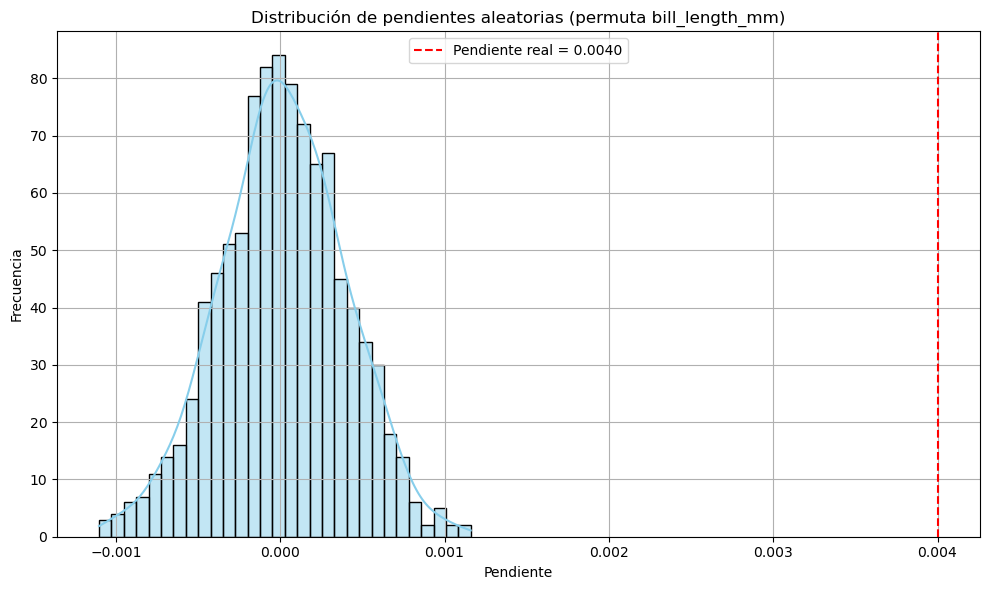

In [345]:
#Distribución de la pendiente de la regresión lineal aleatoria


pendiente, _, _, _, _ = linregress(df['body_mass_g'], df['bill_length_mm'])


n = 1000
slopes_random = []

for _ in range(n):
    shuffled = np.random.permutation(df['bill_length_mm'])
    slope, _, _, _, _ = linregress(df['body_mass_g'], shuffled)
    slopes_random.append(slope)


plt.figure(figsize=(10, 6))
sns.histplot(slopes_random, bins=30, kde=True, color='skyblue')
plt.axvline(pendiente, color='red', linestyle='--', label=f'Pendiente real = {pendiente:.4f}')
plt.title('Distribución de pendientes aleatorias (permuta bill_length_mm)')
plt.xlabel('Pendiente')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Claramente de esto se observa que la hipotesis nula se rechaza con un alto grado de seguridad(ni está serca de la normal) casi con un 99% de certeza, es decir que se rechaza el hecho de la suposicion de que no hay una relación dictada (por la pendiente) entre la longitud de pico y la masa corporal de los pinguinos.

Conclusión: Si hay una relación, dada por la pendiente entre la longitud del pico y la masa de los pinguinos.